<a href="https://colab.research.google.com/github/antontregub/labs/blob/main/lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [168]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [169]:
df = pd.read_csv('titanic.csv')
df = df.replace('?', np.NaN)

In [170]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [171]:
df.shape

(891, 12)

Task 2

In [172]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [173]:
df = df.dropna()

In [174]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [175]:

df['Name'] = pd.Categorical(df['Name'])
df['Sex'] = pd.Categorical(df['Sex'])
df['Age'] = pd.Categorical(df['Age'])
df['SibSp'] = pd.Categorical(df['SibSp'])
df['Parch'] = pd.Categorical(df['Parch'])
df['Ticket'] = pd.Categorical(df['Ticket'])
df['Fare'] = pd.Categorical(df['Fare'])
df['Cabin'] = pd.Categorical(df['Cabin'])
df['Embarked'] = pd.Categorical(df['Embarked'])

Task 3

In [176]:
df_for_viz = df.copy()
for column in df_for_viz.select_dtypes(include='category').columns:
    df_for_viz[column] = df_for_viz[column].cat.codes

All-vs-All correlation

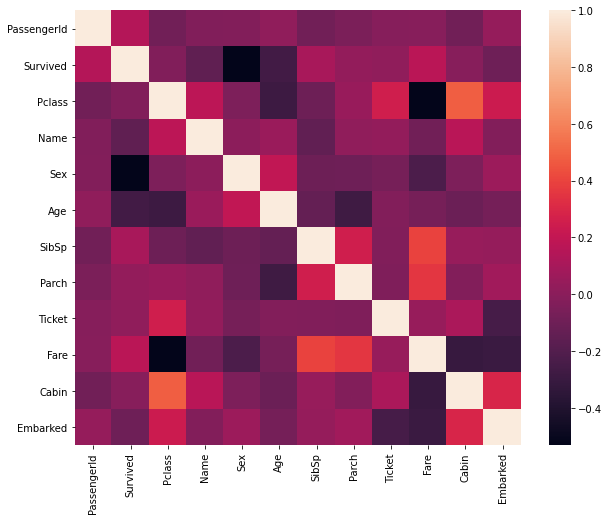

In [177]:
plt.figure(figsize=(10,8))
sns.heatmap(df_for_viz.corr())



```
# Distribution plots
```



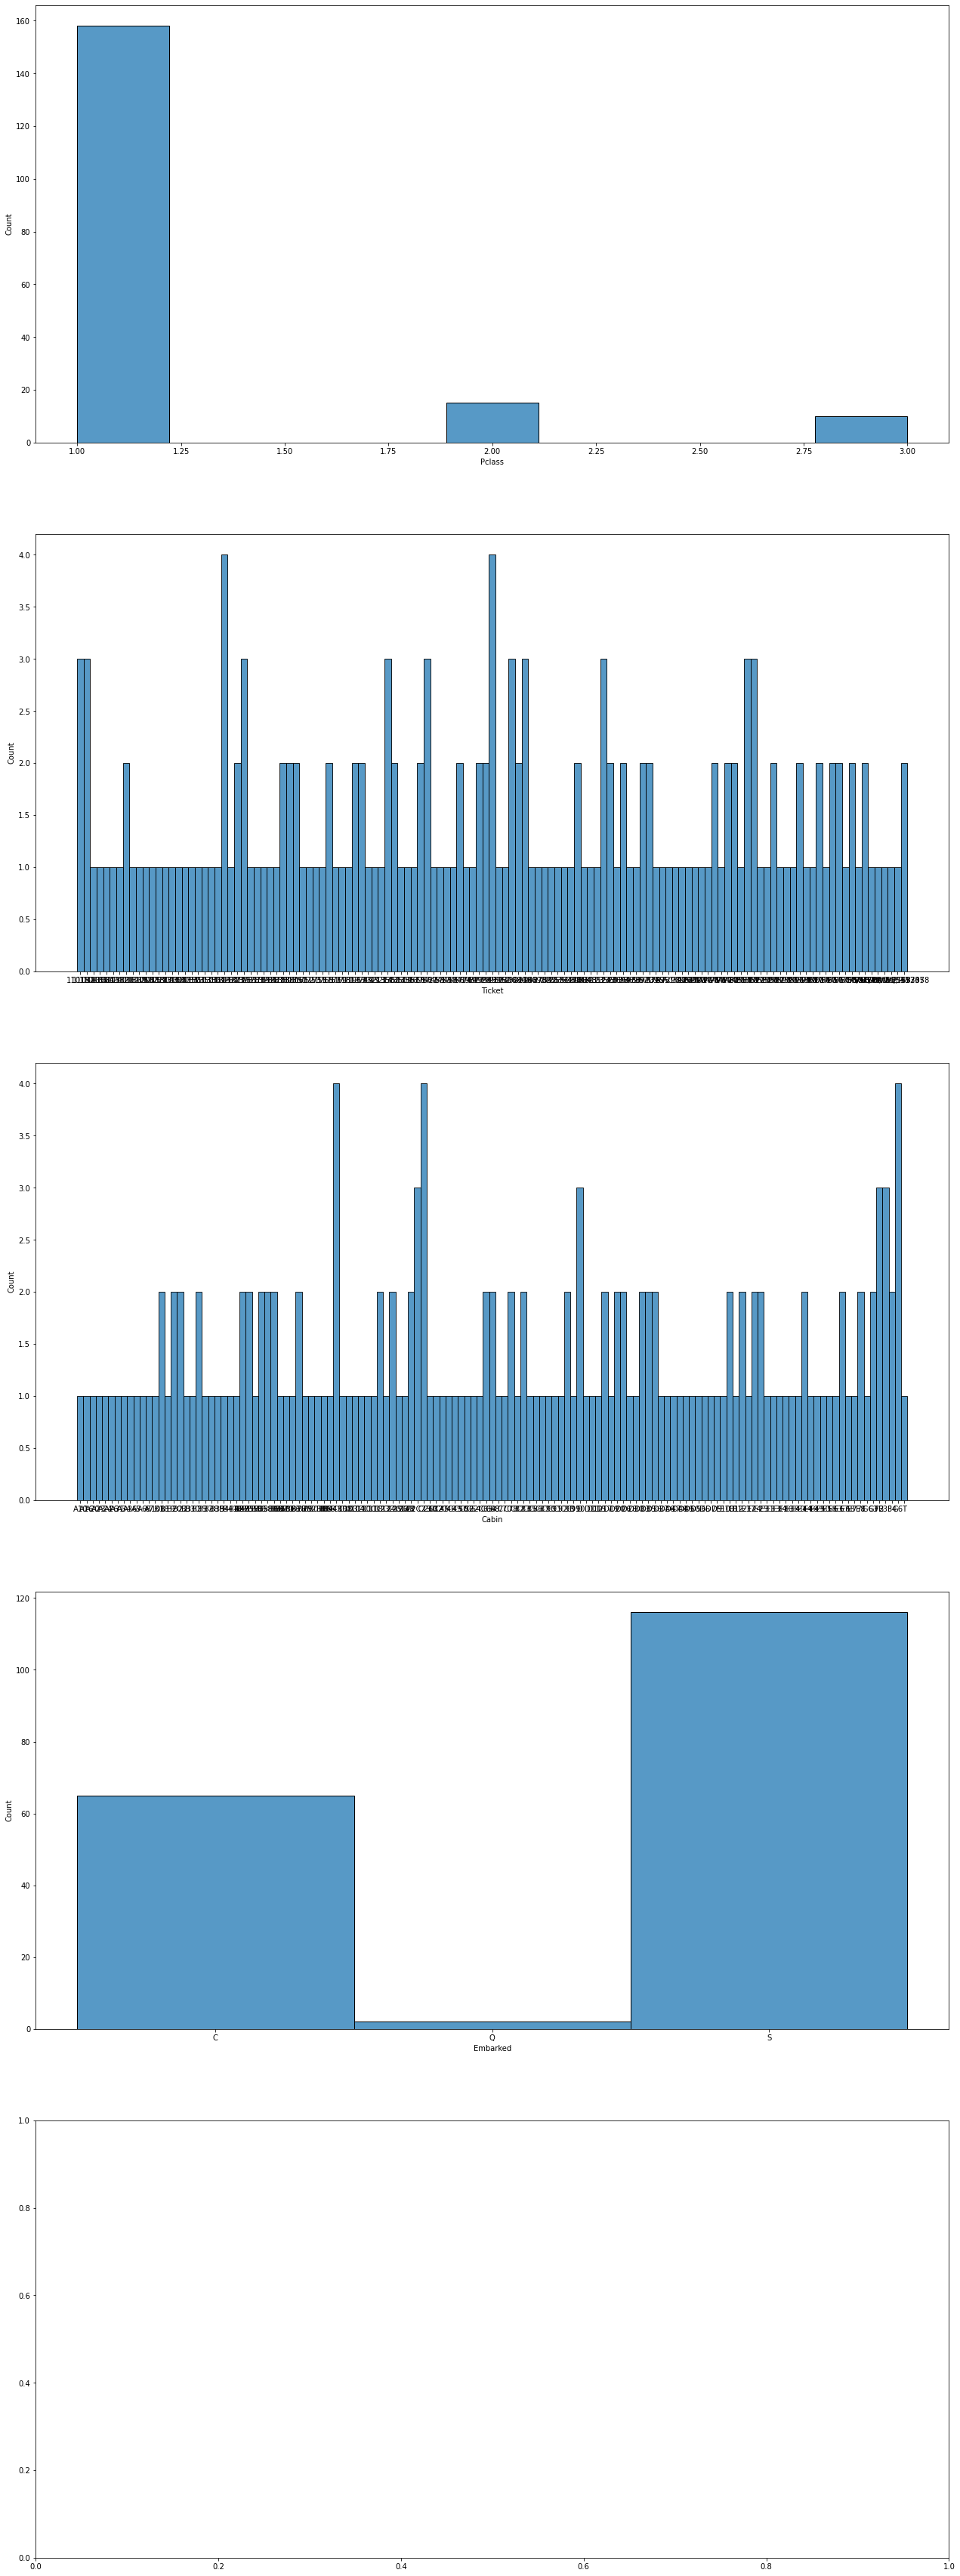

In [178]:
fig, axes = plt.subplots(nrows=5, ncols=1,figsize=(20,50))
fig.tight_layout(pad=10.0)
ax_iter = iter(axes.flat)
for column in [ 'Pclass', 'Ticket', 'Cabin', 'Embarked']:
    ax = next(ax_iter)
    a = sns.histplot(df[column],ax=ax)

Boxplots conditioned on label

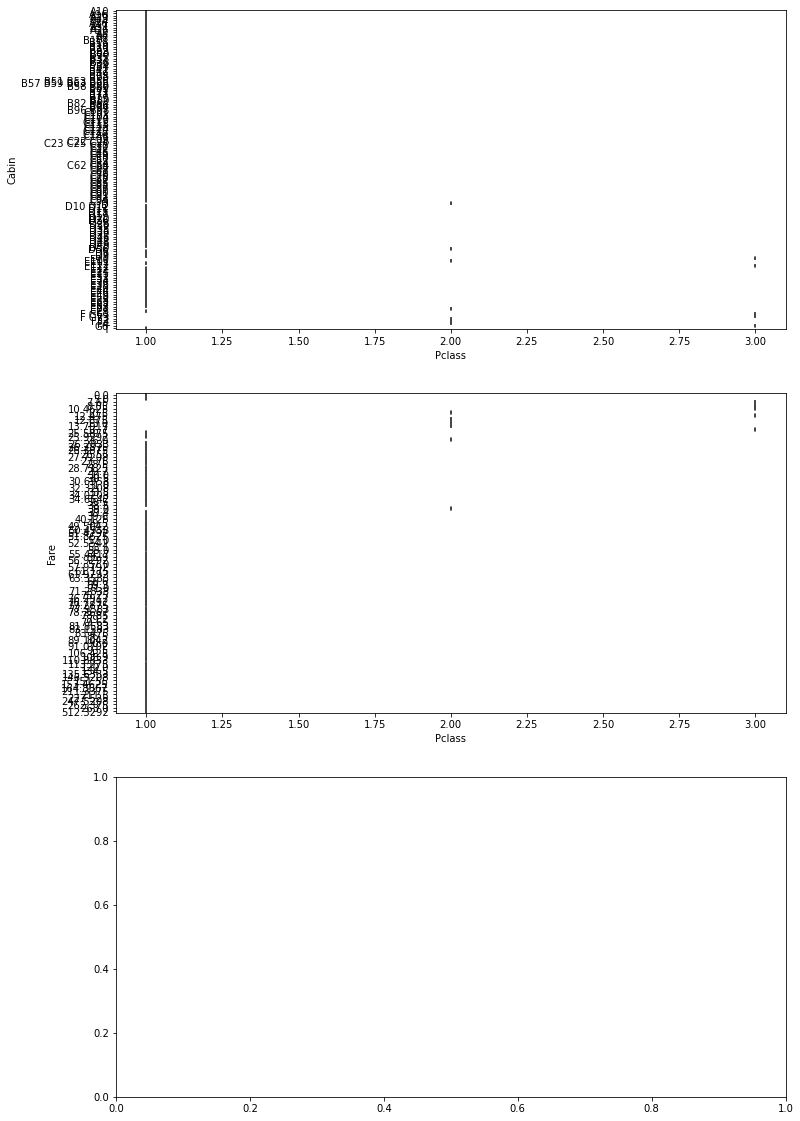

In [179]:
fig, axes = plt.subplots(nrows=3, ncols=1,figsize=(12,20))
ax_iter = iter(axes.flat)
for column in [ 'Cabin', 'Fare']:
    ax = next(ax_iter)
    a = sns.boxplot(x='Pclass', y=column, data=df,ax=ax)

In [180]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, classification_report, confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

One-Hot encoding

In [181]:
for column in df.select_dtypes(include='category').columns:
    if column=='Embarked':
        continue
    df = pd.concat([df, pd.get_dummies(df[column], prefix=column)],axis=1)
    df.drop([column],axis=1, inplace=True)

In [182]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Embarked',axis=1), df['Embarked'].cat.codes, test_size=0.2, random_state=42)

Numerical features scaling

In [183]:
for column in df.select_dtypes(include='int64').columns:
    scale = StandardScaler().fit(X_train[[column]])
    X_train[[column]] = scale.transform(X_train[[column]])
    X_test[[column]] = scale.transform(X_test[[column]])

KNN

In [184]:
n_neighbors = list(range(10,15))
hyperparameters = dict(n_neighbors=n_neighbors)
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, hyperparameters, cv=3, n_jobs=-1, verbose=10)
best_model = clf.fit(X_train,y_train)
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.6s


Best n_neighbors: 12


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    1.7s finished


In [185]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [186]:
knn.score(X_test, y_test)

0.5675675675675675

In [187]:
f1_score(y_test, y_pred, average='weighted')

0.5294525294525294

Decision Tree

In [188]:
max_depth = [None,5,10,15]
hyperparameters = dict(max_depth=max_depth)
dtc = DecisionTreeClassifier()
clf = GridSearchCV(dtc, hyperparameters, cv=3, n_jobs=-1, verbose=10)
best_model = clf.fit(X_train,y_train)
print('Best max_depth:', best_model.best_estimator_.get_params()['max_depth'])

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0288s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0456s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.1s finished


Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best max_depth: None


In [189]:
dtc = DecisionTreeClassifier(max_depth=10)
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)
print('Score:', dtc.score(X_test, y_test))
print(f1_score(y_test, y_pred, average='weighted'))

Score: 0.5675675675675675
0.5113513513513513


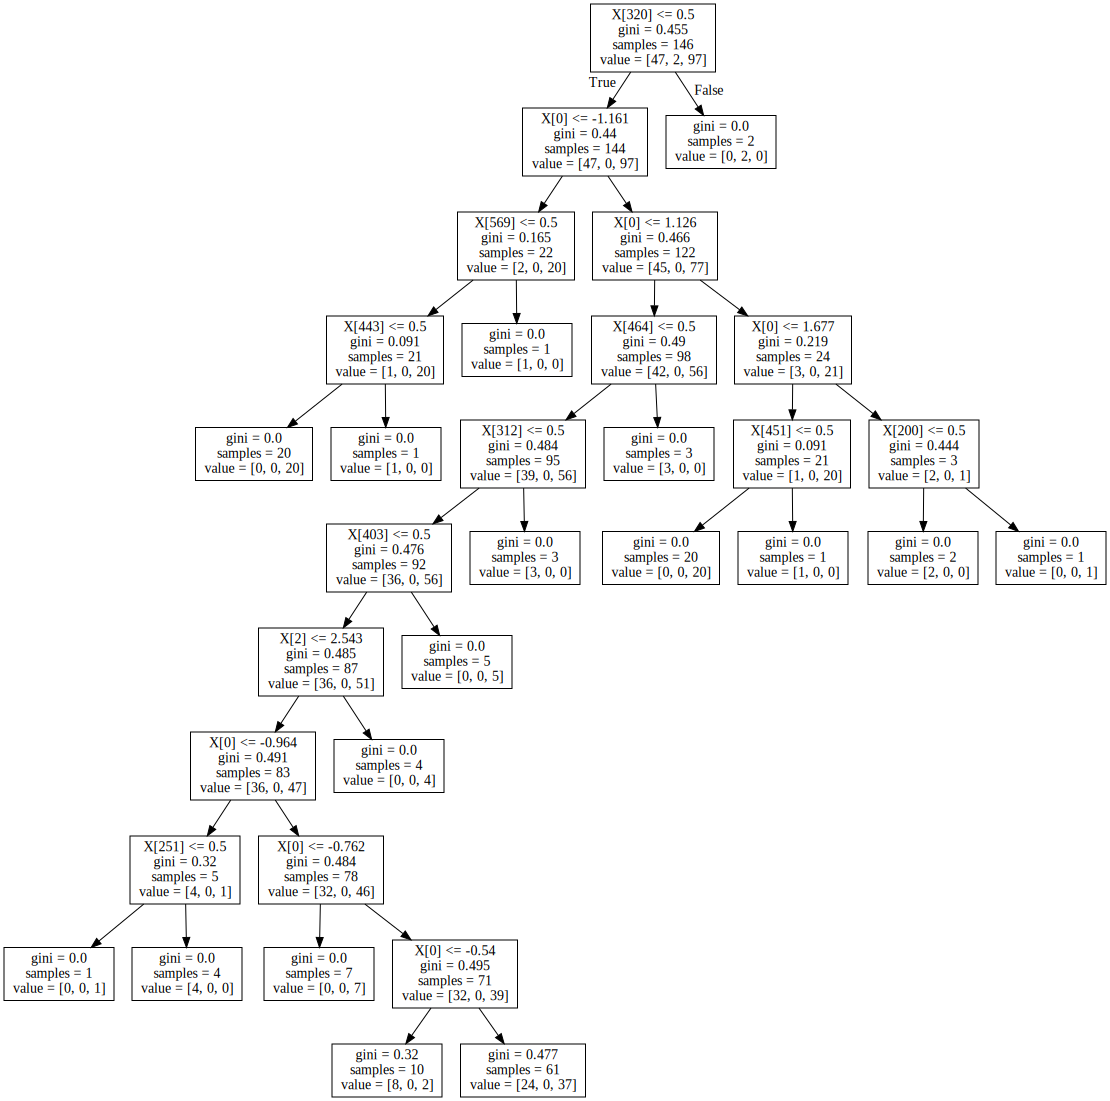

In [190]:
import graphviz
dot_data = export_graphviz(dtc, out_file=None, 
                                filled=False)
graph = graphviz.Source(dot_data, format="png") 
graph

In [191]:
X_train.columns

Index(['PassengerId', 'Survived', 'Pclass',
       'Name_Allen, Miss. Elisabeth Walton',
       'Name_Allison, Master. Hudson Trevor',
       'Name_Allison, Miss. Helen Loraine',
       'Name_Allison, Mrs. Hudson J C (Bessie Waldo Daniels)',
       'Name_Anderson, Mr. Harry', 'Name_Andrews, Miss. Kornelia Theodosia',
       'Name_Andrews, Mr. Thomas Jr',
       ...
       'Cabin_E68', 'Cabin_E77', 'Cabin_E8', 'Cabin_F G63', 'Cabin_F G73',
       'Cabin_F2', 'Cabin_F33', 'Cabin_F4', 'Cabin_G6', 'Cabin_T'],
      dtype='object', length=612)

SVM

In [192]:
c = [0.1, 1, 2]
gamma = [0.1, 0.5]
kernel = ['rbf']
hyperparameters = dict(C=c, gamma=gamma, kernel=kernel)
svc = SVC()
clf = GridSearchCV(svc, hyperparameters, cv=2, n_jobs=-1, verbose=10)
best_model = clf.fit(X_train,y_train)
print('Best C:', best_model.best_estimator_.get_params()['C'])
print('Best gamma:', best_model.best_estimator_.get_params()['gamma'])
print('Best kernel:', best_model.best_estimator_.get_params()['kernel'])

Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0402s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0801s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.2s finished


Best C: 2
Best gamma: 0.1
Best kernel: rbf


In [193]:
svc = SVC(C=2, kernel='rbf', gamma=0.1)
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)

In [194]:
svc.score(X_test, y_test)

0.6216216216216216

In [195]:
f1_score(y_test, y_pred, average='weighted')

0.5521640521640523

Random Forest

In [196]:
n_estimators = [5, 10, 100, 200, 500]
max_depth = [None, 5, 10,15,20,25]
min_samples_split = [0.1,0.25,0.5,1,2]
hyperparameters = dict(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split)
rfc = RandomForestClassifier()
clf = GridSearchCV(rfc, hyperparameters, cv=2, n_jobs=-1, verbose=10)
best_model = clf.fit(X_train,y_train)
print('Best n_estimators:', best_model.best_estimator_.get_params()['n_estimators'])
print('Best max_depth:', best_model.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', best_model.best_estimator_.get_params()['min_samples_split'])

Fitting 2 folds for each of 150 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0405s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 110 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   26.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   31.1s
[Parallel(n_jobs=-1)]: Done 214 tasks      | elapsed:   36.2s
[Parallel(n_jobs=-1)]: Done 244 tas

Best n_estimators: 10
Best max_depth: None
Best min_samples_split: 2


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   52.3s finished


In [197]:
rfc = RandomForestClassifier(n_estimators=500, max_depth=20, min_samples_split=2)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
rfc.score(X_test, y_test)

0.5135135135135135

In [198]:
f1_score(y_test, y_pred, average='weighted')

0.34845559845559837

 AdaBoost

In [199]:
n_estimators = [10, 50, 100, 500]
learning_rate = [0.1, 0.5, 1, 2, 5, 10]
algorithm = ['SAMME', 'SAMME.R']
hyperparameters = dict(n_estimators=n_estimators, learning_rate=learning_rate, algorithm=algorithm)
abc = AdaBoostClassifier()
clf = GridSearchCV(abc, hyperparameters, cv=2, n_jobs=-1, verbose=10)
best_model = clf.fit(X_train,y_train)
print('Best n_estimators:', best_model.best_estimator_.get_params()['n_estimators'])
print('Best learning_rate:', best_model.best_estimator_.get_params()['learning_rate'])
print('Best algorithm:', best_model.best_estimator_.get_params()['algorithm'])

Fitting 2 folds for each of 48 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0469s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0957s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done  93 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:   20.0s finished


Best n_estimators: 100
Best learning_rate: 1
Best algorithm: SAMME


In [200]:
abc = AdaBoostClassifier(n_estimators=500, learning_rate=1, algorithm='SAMME.R')
abc.fit(X_train,y_train)
y_pred = abc.predict(X_test)
abc.score(X_test, y_test)

0.6216216216216216

In [201]:
f1_score(y_test, y_pred, average='weighted')

0.615990990990991

Gradient Boost

In [202]:
learning_rate = [0.01, 0.1, 0.5]
n_estimators = [100, 250, 500]
max_depth = [3, 5, 7]
hyperparameters = dict(learning_rate=learning_rate, n_estimators=n_estimators, max_depth=max_depth)
gbc = GradientBoostingClassifier()
clf = GridSearchCV(gbc, hyperparameters, cv=2, n_jobs=-1, verbose=10)
best_model = clf.fit(X_train,y_train)
print('Best learning_rate:', best_model.best_estimator_.get_params()['learning_rate'])
print('Best n_estimators:', best_model.best_estimator_.get_params()['n_estimators'])
print('Best max_depth:', best_model.best_estimator_.get_params()['max_depth'])

Fitting 2 folds for each of 27 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   31.6s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:   34.8s finished


Best learning_rate: 0.5
Best n_estimators: 100
Best max_depth: 3


In [203]:
gbc = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, max_depth=3)
gbc.fit(X_train,y_train)
y_pred = gbc.predict(X_test)
gbc.score(X_test, y_test)

0.6216216216216216

In [204]:
f1_score(y_test, y_pred, average='weighted')

0.5724324324324325

Best model by f1-score - GradientBoostingClassifier¶

In [205]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.28      0.42        18
           2       0.58      0.95      0.72        19

    accuracy                           0.62        37
   macro avg       0.71      0.61      0.57        37
weighted avg       0.70      0.62      0.57        37



In [206]:
print(confusion_matrix(y_test, y_pred))

[[ 5 13]
 [ 1 18]]
